In [5]:
!pip install rdkit py3Dmol

In [ ]:
# Import necessary libraries
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, rdDepictor
import py3Dmol

from IPython.display import display, HTML
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/19ncnh-alZiqGPteRQ_npl-iF1gJ_vlSc?usp=sharing)

# **Week 8 - Introduction to SMILES AND SMARTS**

## **Abstract**

1. **Introduction to SMILES**: The Simplified Molecular Input Line Entry System (SMILES) used to represent molecules as linear strings. There naming convention and application in Cheminformatics and datasets is discussed.

2. **Introduction to SMARTS**: SMARTS stands for SMILES Arbitrary Target Specification and is an extension of SMILES. Unlike SMILES, SMARTS is optimal for substructure searches and reaction predictions because of a molecules representation.


>### **References: Essential Resources for Further Learning**
>
>- **PyTorch**: [Official Documentation](https://pytorch.org/docs/stable/index.html)
>- **SMILES Tutorial**: [Online Course](https://archive.epa.gov/med/med_archive_03/web/html/smiles.html)
>- **SMARTS - A Language for Describing Molecular Patterns
**: [Online Course](https://www.daylight.com/dayhtml/doc/theory/theory.smarts.html)


Feel free to explore these resources to deepen your understanding of data visualization, data management, and computational tools in Chemistry.





In [44]:
# Define the SMILES string for Caffeine
caffeine_smiles = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"

# Convert SMILES to a molecule object and generate 3D coordinates
caffeine_molecule = Chem.MolFromSmiles(caffeine_smiles)
caffeine_molecule = Chem.AddHs(caffeine_molecule)
AllChem.EmbedMolecule(caffeine_molecule, AllChem.ETKDG())

# Use py3Dmol for 3D visualization
view = py3Dmol.view(width=1400, height=400)
view.addModel(Chem.MolToMolBlock(caffeine_molecule), format="mol")
view.setStyle({'stick': {}})
view.zoomTo()
view.show()


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## **Understanding SMILES Notation**

The **Simplified Molecular Input Line Entry System (SMILES)** is a notation that allows a user to represent a chemical structure in a way that can be used by computer programs. It is a compact and linear way of describing the structure of molecules.

<br>

### B**reaking Down the SMILES String**

1. **Atoms and Bonds**: In SMILES, atoms are represented by their chemical symbols (e.g., C for carbon, N for nitrogen, O for oxygen). Bonds between atoms are often implied but can also be explicitly represented (e.g., '=' for a double bond).

2. **Ring Structures**: Numbers in the SMILES string are used to denote ring closures. In caffeine, the numbers 1 and 2 indicate the points at which ring structures are formed. For example, `N1C=NC2` indicates that the nitrogen atom (N) is involved in two ring structures, connecting at points labeled 1 and 2.

3. **Branches**: Parentheses are used to indicate branches from the main chain. In the case of caffeine, `(=O)` and `(C(=O)N2C)` are branches off the main structure.





In [32]:
# List of commonly known molecules and their SMILES strings
molecules = {
    "Caffeine": "CN1C=NC2=C1C(=O)N(C(=O)N2C)C",
    "Aspirin": "CC(=O)OC1=CC=CC=C1C(=O)O",
    "Acetaminophen": "CC(=O)NC1=CC=C(O)C=C1",
    "Benzene": "c1ccccc1"
}

# Generate 3D coordinates for each molecule
for name, smiles in molecules.items():
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    AllChem.EmbedMolecule(mol, AllChem.ETKDG())
    molecules[name] = mol

# Use py3Dmol to visualize the molecules side by
view = py3Dmol.view(linked=False, viewergrid=(1,len(molecules)), width=1800, height=350)

# Define styles for each molecule
styles = {
    "Caffeine": {'stick': {'colorscheme': 'default'}},
    "Aspirin": {'sphere': {'scale': 0.3}},

    "Acetaminophen": {'stick': {'radius': 0.15}},
    "Benzene": {'stick': {'colorscheme': 'blueCarbon'}}
}

# Add each molecule to the grid with a label
for i, (name, mol) in enumerate(molecules.items()):
    view.addModel(Chem.MolToMolBlock(mol), format="mol", viewer=(0, i))
    view.setStyle(styles[name], viewer=(0, i))
    view.addLabel(name, {'position': {'x':2.5, 'y':2, 'z':1}, 'backgroundColor': 'black'}, viewer=(0, i))
    view.zoomTo(viewer=(0, i))

view.show()


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### **Naming the Molecule from the Structure**

To name the molecule from the visual representation:

1. **Identify the Backbone**: Look for the longest chain or the most complex ring structure as the backbone of the molecule.

2. **Number the Atoms**: The atom numbering in the visualization aids in identifying which atoms are connected. This is crucial for interpreting the SMILES string.

3. **Identify Functional Groups**: Look for common functional groups (like carbonyl groups, amine groups, etc.) and how they are connected to the backbone.

4. **Apply IUPAC Rules**: Use IUPAC nomenclature rules to systematically name the molecule based on the backbone, functional groups, and their positions.

<!DOCTYPE html>
<html>
<head>
    <style>
        .centered-image {
            display: block;
            margin-left: auto;
            margin-right: auto;
            width: 50%;
        }
    </style>
</head>
<body>

<a href="https://www.chemistryworld.com/opinion/weiningers-smiles/4014639.article" target="_blank">
    <img src="https://d2cbg94ubxgsnp.cloudfront.net/Pictures/1024x536/7/1/6/516716_smiles_54413.png"
         alt="Varied Initial Conditions for Gradient Descent"
         class="centered-image">
</a>

<br>
<figcaption align = "center"><b>Figure 1 - SMILES naming convention. Ciprofloxacin written as a Smiles string. Figure from
Andrea Sella.</b></figcaption>

</body>
</html>

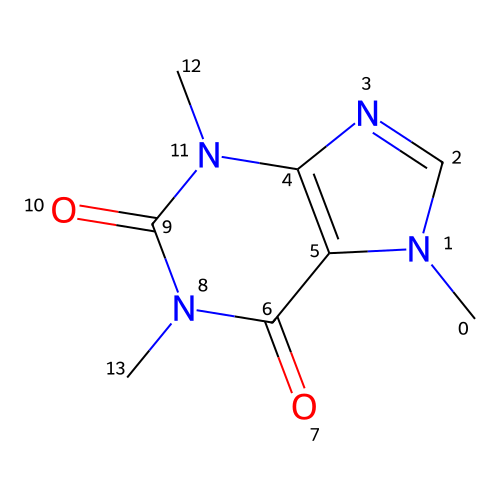

In [35]:
# Define the SMILES string for caffeine
caffeine_smiles = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"

# Create RDKit molecule object for caffeine
caffeine_molecule = Chem.MolFromSmiles(caffeine_smiles)

# Generate 2D coordinates for caffeine
Chem.rdDepictor.Compute2DCoords(caffeine_molecule)

# Create a drawing object for caffeine and draw the molecule
d_caffeine = rdMolDraw2D.MolDraw2DSVG(500, 500)
d_caffeine.drawOptions().addAtomIndices = True  # Add atom numbering
d_caffeine.drawOptions().atomLabelFontSize = 16
d_caffeine.DrawMolecule(caffeine_molecule)
d_caffeine.FinishDrawing()

# Display the caffeine molecule
display(SVG(d_caffeine.GetDrawingText()))


> ### **Visualizing Caffeine's Structure**
> The **RDKit library** is used to generate a visual representation of the caffeine molecule. The code generates **2D coordinates** for the molecule and creates a drawing with atom numbering. This visualization helps in understanding how the SMILES string corresponds to the actual structure of the molecule.

### **Pros of SMILES Notation:**

1. **Simplicity and Compactness:** SMILES provides a straightforward way to depict complex molecular structures with a simple string of characters, making it easy to share and store molecular data.

2. **Computer Readability:** The linear format of SMILES is highly compatible with computer algorithms, facilitating tasks like database searching, structure-activity relationship studies, and machine learning applications in cheminformatics.

3. **Universality:** It's a standard notation in cheminformatics, used across various software and databases for molecular modeling and chemical informatics.

### **Cons of SMILES Notation:**

1. **Lack of 3D Information:** SMILES represents molecules in a 2D format and doesn't encode three-dimensional structural information, which is crucial for understanding certain molecular properties and interactions.

2. **Ambiguity in Representation:** Different ways of writing SMILES for the same molecule can lead to ambiguity. This is particularly challenging when dealing with stereochemistry.

3. **Learning Curve:** For those new to chemistry or cheminformatics, interpreting SMILES strings can be non-intuitive and requires a learning period.



## **Introduction to SMARTS**

**SMARTS** stands for **SMILES Arbitrary Target Specification**. It is an extension of the SMILES notation and is used in cheminformatics for specifying substructure patterns in molecules. SMARTS is widely used for searching **molecular databases** because it can represent **more complex patterns and molecular structures** than SMILES.

### **Key Features of SMARTS**

- **Versatility in Pattern Representation**: SMARTS can represent a wide range of chemical patterns, from simple atomic properties to complex molecular structures.
- **Logical Operators**: It supports logical operators (AND, OR, NOT), allowing for the construction of sophisticated query patterns.
- **Recursion**: SMARTS supports recursive SMARTS, enabling nested substructure queries.

<br>

<!DOCTYPE html>
<html>
<head>
    <style>
        .centered-image {
            display: block;
            margin-left: auto;
            margin-right: auto;
            width: 50%;
        }
    </style>
</head>
<body>

<a href="https://www.researchgate.net/figure/SMILES-SMARTS-InChI-and-InChIKey-concepts-Examples-for-the-illustration-of-basic_fig1_344906202" target="_blank">
    <img src="https://www.researchgate.net/profile/Jose-Medina-Franco/publication/344906202/figure/fig1/AS:951357817237505@1603832787571/SMILES-SMARTS-InChI-and-InChIKey-concepts-Examples-for-the-illustration-of-basic.ppm"
         alt="Varied Initial Conditions for Gradient Descent"
         class="centered-image">
</a>

<br>
<figcaption align = "center"><b>Figure 2 - SMILES, SMARTS, InChI and InChIKey concepts. Figure by
Jose L Medina-Franco.</b></figcaption>

</body>
</html>

### **Comparing SMARTS and SMILES**

While SMILES is primarily used for encoding the structure of a molecule, SMARTS is used for searching specific patterns within molecular structures. The key differences are:

- **Flexibility**: SMARTS offers greater flexibility and is more expressive in defining substructures and patterns within molecules.
- **Query Capability**: SMARTS can be used to define complex queries, which is not possible with SMILES.

### **Example Comparison: Benzene Ring**

**SMILES Representation of Benzene**: `C1=CC=CC=C1`

This representation in SMILES denotes the structure of benzene, a simple aromatic ring.

**SMARTS Representation for Searching Benzene Rings**: `c1ccccc1`

In this SMARTS query, the lowercase ‘c’ represents an aromatic carbon, and the pattern is designed to search for structures containing a benzene ring.

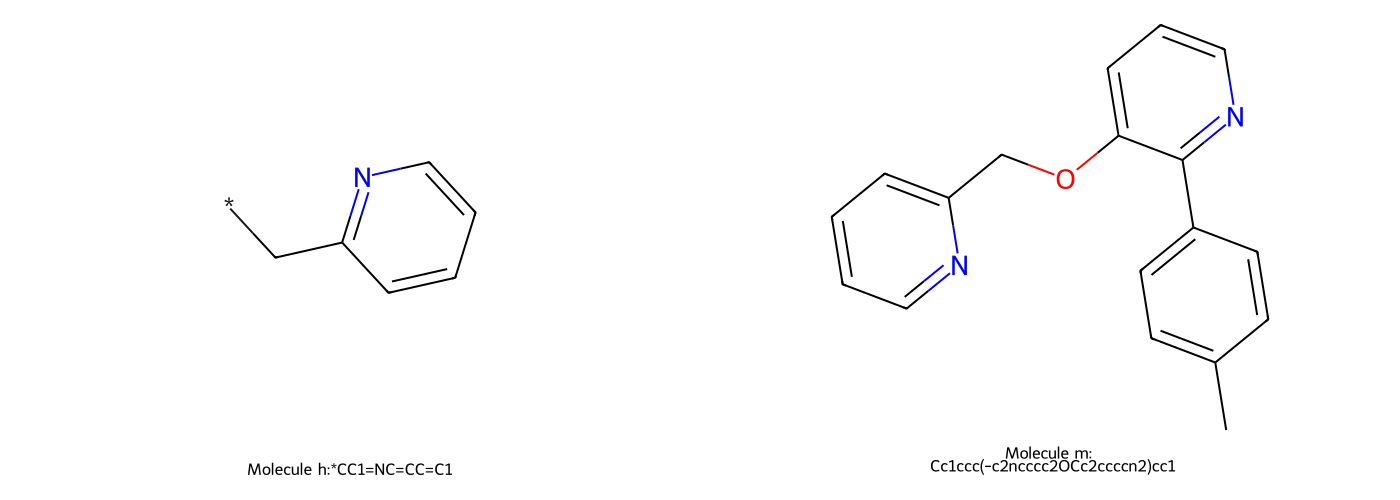

In [68]:
# Molecules from SMILES
h_smiles = "*CC1=NC=CC=C1"  # Molecule with dummy atom
m_smiles = "Cc1ccc(-c2ncccc2OCc2ccccn2)cc1"  # Second molecule

h = Chem.MolFromSmiles(h_smiles)
m = Chem.MolFromSmiles(m_smiles)

# Generate 2D coordinates for both molecules
rdDepictor.Compute2DCoords(h)
rdDepictor.Compute2DCoords(m)

# Convert dummies into queries for substructure matching
p = Chem.AdjustQueryParameters.NoAdjustments()
p.makeDummiesQueries = True
hq = Chem.AdjustQueryProperties(h, p)
match = m.HasSubstructMatch(hq)

image_size = (700, 500)  # Adjust as needed


# Create a single image with both molecules
img = Draw.MolsToGridImage([h, m], legends=[f"Molecule h:{h_smiles}", f"Molecule m: \n {m_smiles}"],  molsPerRow=2, subImgSize=image_size)

# Display the combined image
display(img)



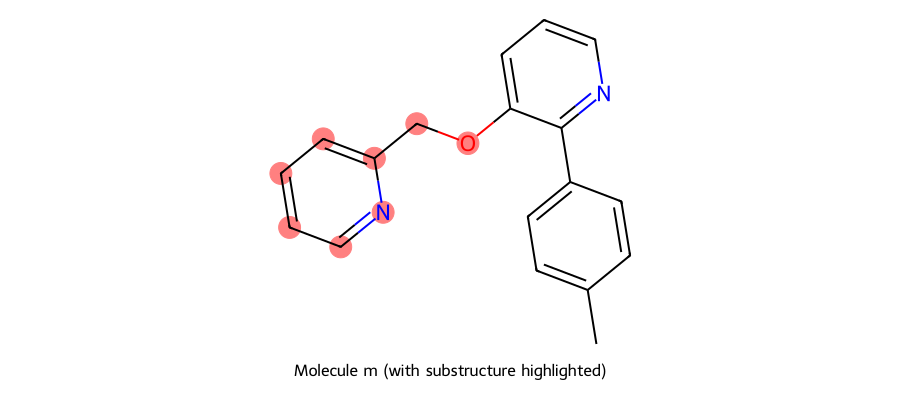

Does 'm' have a substructure match of 'h'?  True


In [69]:
# If there's a match, highlight it in 'm'
if match:
    matching_atoms = m.GetSubstructMatch(hq)
    # Specify the size of the image (width, height) in pixels
    img_size = (900, 400)  # Example size, you can adjust as needed
    img2_highlighted = Draw.MolToImage(m, size=img_size, highlightAtoms=matching_atoms,
                                       legend="Molecule m (with substructure highlighted)")
    display(img2_highlighted)

# Print whether 'm' has a substructure match of 'h'
print("Does 'm' have a substructure match of 'h'?: ", match)

### **Why SMARTS over SMILES for Substructure Searches**

- **Specificity**: SMARTS allows for the specification of aromaticity, charge, and other features, making it more specific for substructure searches.
- **Logical Operations**: The inclusion of logical operators in SMARTS makes it possible to create more complex and refined searches.
- **Greater Search Power**: SMARTS can describe a broader range of chemical features, which is crucial for effective substructure searching in large chemical databases.

## **Representing Chemical Reactions using SMARTS**

SMARTS notation, an extension of the SMILES system, has the capability to describe not just static molecular structures but also dynamic chemical reactions. This is accomplished using the ">>" operator, which separates reactants from products, offering a simple yet powerful way to depict chemical processes.

### **The Role of ">>" in SMARTS**
The **">>" operator** is the heart of **reaction representation** in SMARTS. It serves as a delimiter that clearly distinguishes the **starting materials (reactants)** from the resulting **compounds (products)** in a chemical reaction. Here's how it functions in the context of reaction queries:

- **Reactant to Product Transition**: A SMARTS string containing ">>" translates to a transformation where the specified pattern on the left of ">>" (the reactant(s)) undergoes a change to become the pattern on the right (the product(s)).

- **Search and Match**: In database searching, the ">>" operator allows the identification of reactions where a particular substructure is transformed. For example, a query might search for all reactions where a specific functional group is modified.

<!DOCTYPE html>
<html>
<head>
    <style>
        .centered-image {
            display: block;
            margin-left: auto;
            margin-right: auto;
            width: 50%;
        }
    </style>
</head>
<body>

<a href="https://www.researchgate.net/figure/The-principle-of-SMARTS-based-reaction-generation-algorithm-on-chemical-knowledge_fig5_335991819" target="_blank">
    <img src="https://www.researchgate.net/profile/Qilei-Liu/publication/335991819/figure/fig5/AS:814103383777280@1571108780323/The-principle-of-SMARTS-based-reaction-generation-algorithm-on-chemical-knowledge.jpg"
         alt="The principle of SMARTS-based reaction generation algorithm"
         class="centered-image">
</a>

<br>
<figcaption align = "center"><b>Figure 3 - The principle of SMARTS-based reaction generation algorithm. Figure from
Qilei Liu.</b></figcaption>

### **Application Examples**
To give an example, the SMARTS notation for an esterification reaction where an alcohol and an acid react to form an ester and water would be represented as:

```
[alcohol].[acid]>>[ester].[water]
```

In SMARTS-based reaction databases, this enables the search for esterification reactions by using patterns that represent the relevant functional groups involved in the reaction.



> For further information on SMARTS and its application in cheminformatics, the Daylight Theory Manual is an excellent resource:
[Daylight Theory: SMARTS - A Language for Describing Molecular Patterns](https://www.daylight.com/dayhtml/doc/theory/theory.smarts.html).